-----

### DNN의 기본 구성과 레이어 학습과정
- mnist 데이터(binary image) 학습모델

In [46]:
from keras.models import Sequential
from keras.layers import Dense
from keras import layers
import numpy as np
from keras import datasets
from keras.utils import np_utils
import keras

(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
L,W,H = X_train.shape
print(L) # data length
print(W) # image W
print(H) # image H

X_train = X_train.reshape(-1,W*H)
X_test = X_test.reshape(-1, W*H)
X_train = X_train / 255.0
X_test = X_test / 255.0

60000
28
28


In [17]:
model=Sequential()
model.add(Dense(64, activation='relu', input_dim=W*H))
model.add(layers.Dropout(0.2)) # keras 에서 dropout의 의미 : 20%의 node를 drop하여 학습.
model.add(Dense(32, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
history = model.fit(X_train, y_train, epochs=10, batch_size=100, validation_split=0.2)
performance_test = model.evaluate(X_test, y_test, batch_size=100)
print('Test Loss and Accuracy ->', performance_test)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 2s 41us/step - loss: 0.6561 - acc: 0.7962 - val_loss: 0.2418 - val_acc: 0.9299
Epoch 2/10
48000/48000 [==============================] - 2s 33us/step - loss: 0.3131 - acc: 0.9079 - val_loss: 0.1717 - val_acc: 0.9509
Epoch 3/10
48000/48000 [==============================] - 2s 35us/step - loss: 0.2475 - acc: 0.9273 - val_loss: 0.1483 - val_acc: 0.9572
Epoch 4/10
48000/48000 [==============================] - 2s 35us/step - loss: 0.2131 - acc: 0.9370 - val_loss: 0.1357 - val_acc: 0.9617
Epoch 5/10
48000/48000 [==============================] - 2s 36us/step - loss: 0.1884 - acc: 0.9439 - val_loss: 0.1207 - val_acc: 0.9665
Epoch 6/10
48000/48000 [==============================] - 2s 38us/step - loss: 0.1679 - acc: 0.9498 - val_loss: 0.1153 - val_acc: 0.9676
Epoch 7/10
48000/48000 [==============================] - 2s 35us/step - loss: 0.1590 - acc: 0.9526 - val_loss: 0.1178 - val_acc

validation set : train - test 만 가지고 모델링을 학습하고 평가하면, overfitting에 대한 검증이 어렵고 overfitting이 일어날 확률도 높음. 적은 데이터셋인 경우엔 cross validation을 가지고 이를 극복하지만, 데이터가 큰 경우는 val set으로 test 전의 모델의 대략적인 성능을 가늠하고, test score와 비교하여 overfitting의 여부도 확인해보는 역할을 함.

validation set -> epoch 마다 shuffle이 되는 게 아니고, 고정 데이터셋을 분리해서 사용함.

### color image 학습
- cifar-10 data(3 channel)

In [52]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)
  
L,W,H,C = X_train.shape
print(L) # data length
print(W) # image W
print(H) # image H
print(C) # image Channel

X_train = X_train.reshape(-1, W*H*C)
X_test = X_test.reshape(-1, W*H*C)
  
X_train = X_train / 255.0
X_test = X_test / 255.0

50000
32
32
3


In [61]:
model=Sequential()
model.add(Dense(128, activation='relu', input_dim=W*H*C))
model.add(layers.Dropout(0.15))
model.add(Dense(96, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(Dense(10, activation = 'softmax')) # 최종 class의 개수가 10개이므로, output dense도 10개로 맞춰줌
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

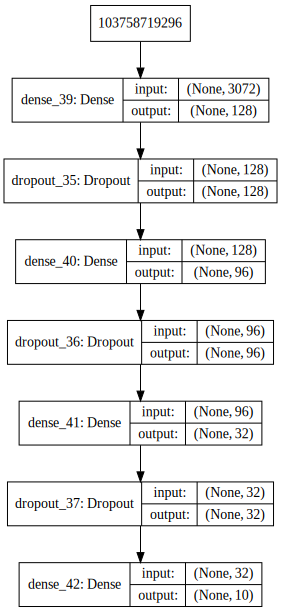

In [62]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [63]:
import matplotlib.pyplot as plt

history = model.fit(X_train, Y_train, epochs=50, batch_size=1500, validation_split=0.2)
performance_test=model.evaluate(X_test,Y_test, batch_size=1500)
print('Test Loss and Accuracy ->', performance_test)

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 [==============================] - 4s 94us/step - loss: 2.3268 - acc: 0.1309 - val_loss: 2.2264 - val_acc: 0.2096
Epoch 2/50
40000/40000 [==============================] - 3s 68us/step - loss: 2.1866 - acc: 0.1811 - val_loss: 2.0840 - val_acc: 0.2577
Epoch 3/50
40000/40000 [==============================] - 3s 69us/step - loss: 2.0913 - acc: 0.2130 - val_loss: 1.9990 - val_acc: 0.2767
Epoch 4/50
40000/40000 [==============================] - 3s 68us/step - loss: 2.0320 - acc: 0.2381 - val_loss: 1.9367 - val_acc: 0.2951
Epoch 5/50
40000/40000 [==============================] - 3s 69us/step - loss: 1.9863 - acc: 0.2608 - val_loss: 1.8835 - val_acc: 0.3211
Epoch 6/50
40000/40000 [==============================] - 3s 69us/step - loss: 1.9599 - acc: 0.2744 - val_loss: 1.8883 - val_acc: 0.3234
Epoch 7/50
40000/40000 [==============================] - 3s 73us/step - loss: 1.9407 - acc: 0.2809 - val_loss: 1.8515 - val_acc

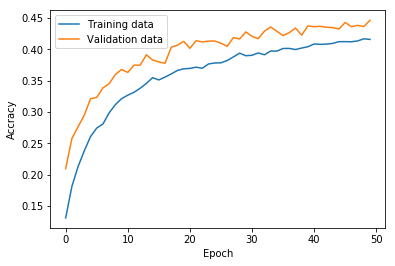

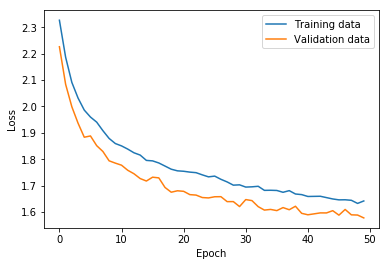

In [64]:
# visualize model acc
history = history.history
plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.ylabel('Accracy')
plt.xlabel('Epoch')
plt.legend(['Training data', 'Validation data'], loc=0)
plt.show()

# visualize model loss
history = history
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training data', 'Validation data'], loc=0)
plt.show()